In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, precision_recall_curve, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import FunctionTransformer


In [2]:
# diabetes_data = pd.read_csv("cleaned_diabetes_data.csv")
diabetes_data = pd.read_pickle("cleaned_diabetes_data.pkl")


In [3]:
diabetes_data.dtypes

race                            category
gender                          category
admission_type_id                  int64
discharge_disposition_id           int64
admission_source_id                int64
time_in_hospital                   int64
num_lab_procedures                 int64
num_procedures                     int64
num_medications                    int64
number_outpatient                  int64
number_emergency                   int64
number_inpatient                   int64
diag_1                          category
diag_2                          category
diag_3                          category
number_diagnoses                   int64
max_glu_serum                   category
A1Cresult                       category
metformin                       category
repaglinide                     category
nateglinide                     category
chlorpropamide                  category
glimepiride                     category
acetohexamide                   category
glipizide       

In [4]:
diabetes_data.head()
# diabetes_data = diabetes_data.drop(columns=["A1Cresult","max_glu_serum",'metformin',
#  'repaglinide',
#  'nateglinide',
#  'chlorpropamide',
#  'glimepiride',
#  'acetohexamide',
#  'glipizide',
#  'glyburide',
#  'tolbutamide',
#  'pioglitazone',
#  'rosiglitazone',
#  'acarbose',
#  'miglitol',
#  'troglitazone',
#  'tolazamide',
#  'examide',
#  'citoglipton',
#  'insulin',
#  'glyburide-metformin',
#  'glipizide-metformin',
#  'glimepiride-pioglitazone',
#  'metformin-rosiglitazone',
#  'metformin-pioglitazone', ])


# diabetes_data["emergency_inpatient_outpatient"] = (diabetes_data['number_emergency'] +
#                                         diabetes_data['number_inpatient'] +
#                                         diabetes_data['number_outpatient'])
# diabetes_data = diabetes_data.drop(columns=['number_emergency', 'number_inpatient', 'number_outpatient'])
diabetes_data.drop(columns=["diag_1", "diag_2", "diag_3"], inplace=True)

In [5]:
target_data = diabetes_data["readmitted"]
# label_encoder = LabelEncoder()
# target_data = label_encoder.fit_transform(target_data)

Readmittance within 30 days (<30) is replaced with 1 and the values "No" and ">30" is replaced with 0

# We are creating a Binary classification of readmittance value. 


In [6]:




target_data = target_data.replace({'<30': 1, '>30':0, "NO":0})


In [7]:
target_data.unique()

[0, 1]
Categories (2, int64): [1, 0]

In [8]:
features_diabetes_data = diabetes_data.drop(columns="readmitted")
features_diabetes_data.head()

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,diabetic_specific_diagnosis,time_spent_hospital_with_med,age_group
1,Caucasian,Female,1,1,7,3,59,0,18,0,...,No,No,No,No,No,Ch,Yes,0,54,young
2,AfricanAmerican,Female,1,1,7,2,11,5,13,2,...,No,No,No,No,No,No,Yes,1,26,young
3,Caucasian,Male,1,1,7,2,44,1,16,0,...,No,No,No,No,No,Ch,Yes,0,32,middle_age
4,Caucasian,Male,1,1,7,1,51,0,8,0,...,No,No,No,No,No,Ch,Yes,1,8,middle_age
5,Caucasian,Male,1,1,2,3,31,6,16,0,...,No,No,No,No,No,No,Yes,1,48,middle_age


In [9]:
#Using the train test split from Sklearn. note that I am using startify because I want the proportions
#of the target to be balanced

In [10]:
x_train, x_test, y_train, y_test = train_test_split(features_diabetes_data,target_data , train_size=.8,random_state=42, stratify=target_data)

In [11]:
x_train.columns

Index(['race', 'gender', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed',
       'diabetic_specific_diagnosis', 'time_spent_hospital_with_med',
       'age_group'],
      dtype='object')

In [12]:
# insanity test for confirming the split
print(f"x_train length  is {len(x_train)} which  should be equal to x_train of length {len(y_train)}")

x_train length  is 78500 which  should be equal to x_train of length 78500


In [13]:
x_train.head()

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,diabetic_specific_diagnosis,time_spent_hospital_with_med,age_group
21855,Caucasian,Female,3,2,1,10,39,1,14,0,...,No,No,No,No,No,No,Yes,0,140,Seniors
44806,Caucasian,Female,1,1,7,12,41,2,23,0,...,No,No,No,No,No,Ch,Yes,0,276,Seniors
77799,Caucasian,Female,3,1,1,9,52,2,21,0,...,No,No,No,No,No,Ch,Yes,0,189,Seniors
65752,Caucasian,Male,1,1,7,7,40,3,9,0,...,No,No,No,No,No,No,No,0,63,Seniors
26763,Caucasian,Female,1,1,6,4,40,0,12,0,...,No,No,No,No,No,No,No,0,48,Seniors


In [14]:
y_train.head()

21855    0
44806    0
77799    0
65752    0
26763    0
Name: readmitted, dtype: category
Categories (2, int64): [1, 0]

In [15]:
categorical_features = [feature for feature in x_train.columns[x_train.dtypes=="category"]]
numerical_features = [feature for feature in diabetes_data.columns[diabetes_data.dtypes=="int64"]]

In [16]:
categorical_features

['race',
 'gender',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'age_group']

In [17]:
numerical_features

['admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'diabetic_specific_diagnosis',
 'time_spent_hospital_with_med']

In [18]:
print(f"Length of {len(categorical_features)} + {len(numerical_features)} = {len(diabetes_data.columns)}")

Length of 30 + 13 = 44


# Numerical and categorical pipeline


In [19]:
log_transformer = FunctionTransformer(np.log1p)
num_pipeline = Pipeline(steps= [
                                ("imputer", SimpleImputer(strategy="mean")),
                                ("log_transform", log_transformer),
                                ("scaler", StandardScaler())
                        
])
cat_pipeline = Pipeline(steps=[
                                ("imputer",SimpleImputer(strategy="most_frequent")),
                                ("one_hot_encode", OneHotEncoder(drop="first", sparse_output=False,handle_unknown='ignore'))
])


# Column transfer to combine pipeline

In [20]:
preprocessor = ColumnTransformer(
                transformers = [ ("number", num_pipeline, numerical_features),
                                ("category", cat_pipeline, categorical_features)
                               ]
                    
)

# bulild a model using Logistic regression

In [21]:
log_reg_pipeline = Pipeline(steps=[("preprocessor", preprocessor),("classifier", LogisticRegression(max_iter=2000))
                                  ])


Now let us fit the pipeline on the data

# i first tried max iter = 1000 but it error out because the iteration was too small to reach a solution so
#I doubled to iteration to 2000

In [22]:
log_reg_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('number',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['admission_type_id',
                                                   'discharge_disposition_id',
                                                   'admission_source_id',
                                                   'time_in_hospital',
                                                   'num_lab_procedures',
                                                   'num_procedures',
                                                   'num_medications...
                                                   'glyburide', 'tolbutamide',
                                                   'pioglitazone',
                                                   'rosiglitazone', 'acarbose',
                                                   'miglitol', 'troglitazone',
                                                   'tolazamide', 'examide',
                                                   'citoglipton', 'insulin',
                                                   'glyburide-metformin',
                                                   'glipizide-metformin',
                                                   'glimepiride-pioglitazone',
                                                   'metformin-rosiglitazone',
                                                   'metformin-pioglitazone',
                                                   'change', 'diabetesMed',
                                                   'age_group'])])),
                ('classifier', LogisticRegression(max_iter=2000))])

In [23]:
readmitanc_predict = log_reg_pipeline.predict(x_test)

/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [26] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [24]:
print(f"Report {classification_report(y_test, readmitanc_predict)}")

Report               precision    recall  f1-score   support

           0       0.89      1.00      0.94     17410
           1       0.33      0.00      0.00      2215

    accuracy                           0.89     19625
   macro avg       0.61      0.50      0.47     19625
weighted avg       0.82      0.89      0.83     19625



In [25]:
print(f"Accuracy is {accuracy_score(y_test, readmitanc_predict)}")

Accuracy is 0.8870318471337579


 There is a huge imbalance in between the two claases. As you can see the model is good at predicting No
readmissions but it terms of predicting readmittance withing 30 days, it does a terrible job. it only predicts 50
percent of readmissions correctly. The recall is worst with predicting 1 percent of the actual readmission.
Therefore, we need to properly balance the classes with SMOT technique.


In [26]:
from imblearn.over_sampling import SMOTE
# sckitlearn pipeline wont work with smot so I am importing Imbpipeline from imbLearn
from imblearn.pipeline import Pipeline as ImbPipeline

In [27]:
y_test[45:55]

92765    0
14837    0
76552    0
76591    0
6077     0
56295    0
43       0
57021    0
67320    0
612      0
Name: readmitted, dtype: category
Categories (2, int64): [1, 0]

# Lets use Random Forest

In [28]:

random_forest_pipeline = ImbPipeline(steps=[("preprocessor", preprocessor),
                                         ("smote", SMOTE(random_state=42, k_neighbors=3)),
                                         ("classifier", RandomForestClassifier(random_state=42))
                                  ])
random_forest_pipeline.fit(x_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('number',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['admission_type_id',
                                                   'discharge_disposition_id',
                                                   'admission_source_id',
                                                   'time_in_hospital',
                                                   'num_lab_procedures',
                                                   'num_procedures',
                                                   'num_medications...
                                                   'rosiglitazone', 'acarbose',
                                                   'miglitol', 'troglitazone',
                                                   'tolazamide', 'examide',
                                                   'citoglipton', 'insulin',
                                                   'glyburide-metformin',
                                                   'glipizide-metformin',
                                                   'glimepiride-pioglitazone',
                                                   'metformin-rosiglitazone',
                                                   'metformin-pioglitazone',
                                                   'change', 'diabetesMed',
                                                   'age_group'])])),
                ('smote', SMOTE(k_neighbors=3, random_state=42)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [29]:
# Now predicting
readmitanc_predict_rf = random_forest_pipeline.predict(x_test)

/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [26] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [30]:
print(f"Accuracy is {accuracy_score(y_test, readmitanc_predict_rf)}")

Accuracy is 0.8827006369426752


In [31]:
print(f"Report {classification_report(y_test, readmitanc_predict_rf)}")

Report               precision    recall  f1-score   support

           0       0.89      0.99      0.94     17410
           1       0.28      0.02      0.04      2215

    accuracy                           0.88     19625
   macro avg       0.58      0.51      0.49     19625
weighted avg       0.82      0.88      0.84     19625



#using class_weight parameter to give more wieght to the minority class and see the difference

In [32]:
rand_forest_cw_included = RandomForestClassifier(class_weight="balanced",random_state=42)
random_forest_pipeline = ImbPipeline(steps=[("preprocessor", preprocessor),
                                         ("smote", SMOTE(random_state=42)),
                                         ("classifier", rand_forest_cw_included)])


In [33]:
random_forest_pipeline.fit(x_train,y_train)
predict_random_forest = random_forest_pipeline.predict(x_test)

/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [26] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [34]:
print(f"Accuracy is {accuracy_score(y_test, predict_random_forest)}")

Accuracy is 0.8825987261146497


In [35]:
print(f"Report {classification_report(y_test, predict_random_forest)}")

Report               precision    recall  f1-score   support

           0       0.89      0.99      0.94     17410
           1       0.29      0.03      0.05      2215

    accuracy                           0.88     19625
   macro avg       0.59      0.51      0.49     19625
weighted avg       0.82      0.88      0.84     19625



In [36]:
# XGBClassifier boost Pipeline
xgb_pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("classifier", XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42))
])



In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "classifier__max_depth": [3, 4, 5, 6],
    "classifier__learning_rate": [0.01, 0.05, 0.1],
    "classifier__n_estimators": [300, 400, 500, 600]
}


grid_search = GridSearchCV(
    estimator=xgb_pipeline,
    param_grid=param_grid,
    cv=5,                   
    scoring="f1",           
    n_jobs=-1,             
    verbose=1
)


In [38]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:06:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:06:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:06:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:06:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_

/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:07:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:07:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [24] during transform. These unknown categories will be encoded as all 

/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:07:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [24] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:07:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [9, 18] during transform. These unknown categories will be encoded as 

/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:08:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:08:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, i

/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:09:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:09:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:09:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not us

/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:09:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [24] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:09:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:09:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not u

/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:10:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:10:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [24] during transform. These unknown categories will be encoded as all 

/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:10:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [24] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Use

/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:11:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [24] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:11:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, 

/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:12:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [24] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:12:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all 

/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [24] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:12:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:12:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, 

/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [24] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:13:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:13:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('number',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('log_transform',
                                                                                          FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['admission_type_id',
                                                                          'discharge_disposition_id',
                                                                          'admission_source_id',
                                                                          'time_in_hospital',
                                                                          'num_lab_procedures',
                                                                          'num_...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.01, 0.05, 0.1],
                         'classifier__max_depth': [3, 4, 5, 6],
                         'classifier__n_estimators': [300, 400, 500, 600]},
             scoring='f1', verbose=1)

In [39]:
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation F1-score:", grid_search.best_score_)

Best parameters found: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 300}
Best cross-validation F1-score: 0.21714267408119553


In [40]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)


/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [26] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [41]:
print(f"The accuracy score is  {accuracy_score(y_test, y_pred)}")
print(f" {classification_report(y_test, y_pred)}")


The accuracy score is  0.833171974522293
               precision    recall  f1-score   support

           0       0.90      0.91      0.91     17410
           1       0.23      0.21      0.22      2215

    accuracy                           0.83     19625
   macro avg       0.57      0.56      0.56     19625
weighted avg       0.83      0.83      0.83     19625



For the Numerical Pipeline, I am going to replace logit transformer with FunctionTransformer
and standard Scaler with Robust scaler because the score of 0.24 precision and 0.21 recall for the minority 
class is not effective.

Creating pipeline with robust scaler and Function Transformer

In [42]:
from sklearn.preprocessing import FunctionTransformer, RobustScaler
num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
#     ("log_transform", FunctionTransformer(np.log1p, validate=False)),
    ("scaler", RobustScaler())
])

Also creating a new category pipeline to handle uknow with "infrequent_if_exist" due to warning messages
while running grid search

In [43]:
cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    #changing handle_unknown to "ignore"
    ("one_hot_encode", OneHotEncoder(drop="first", sparse_output=False, handle_unknown='ignore'))
])


In [44]:
preprocessor = ColumnTransformer(transformers=[
    ("num", num_pipeline, numerical_features),
    ("cat", cat_pipeline, categorical_features)
])

In [45]:
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

In [46]:

xgb_pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
#     ("smot", SMOTE(sampling_strategy=0.3 , random_state=42)),
    ("classifier", XGBClassifier( 
        objective="binary:logistic",
        scale_pos_weight=scale_pos_weight,
        use_label_encoder=False, 
#         eval_metric="mlogloss",
        eval_metric="logloss",
        random_state=42,
        reg_lambda=1.0, 
        reg_alpha=0.1
    ))
])

In [47]:
# param_grid = {
#     "classifier__max_depth": [3, 5],
#     "classifier__learning_rate": [0.01, 0.1],
#     "classifier__n_estimators": [200, 300],
#     "classifier__subsample": [0.8, 1.0],
#     "classifier__colsample_bytree": [0.8, 1.0]
# }

In [48]:
param_dist = {
    "classifier__max_depth": [3, 5, 7],
    "classifier__learning_rate": [0.01, 0.05],
    "classifier__n_estimators": [100, 200],
    "classifier__subsample": [0.8, 1.0],
    "classifier__colsample_bytree": [0.8, 1.0]
}

In [49]:
# from sklearn.model_selection import StratifiedKFold
# grid_search = GridSearchCV(
#     estimator=xgb_pipeline,
#     param_grid=param_grid,
#     cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
#     scoring="recall",  
#     n_jobs=-1,
#     verbose=1
# )

In [50]:
random_search = RandomizedSearchCV(
    estimator=xgb_pipeline,
    param_distributions=param_dist,
    n_iter=10,  # Only try 10 random combinations
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),  # Reduced to 3 folds
    scoring="recall",
    n_jobs=-1,
    verbose=1,
    random_state=42
)

In [51]:
# grid_search.fit(x_train, y_train)

In [52]:
random_search.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:14:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:14:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:14:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:14:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_

/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:14:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [9, 16, 18] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7, 17, 22, 24] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [9, 16, 18] during transform. These unknown categories will be encoded as all 

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['admission_type_id',
                                                                                'discharge_disposition_id',
                                                                                'admission_source_id',
                                                                                'time_in_hospital',
                                                                                'num_lab_procedures',
                                                                                'num_pro...
                                                            monotone_constraints=None,
                                                            multi_strategy=None,
                                                            n_estimators=None,
                                                            n_jobs=None,
                                                            num_parallel_tree=None, ...))]),
                   n_jobs=-1,
                   param_distributions={'classifier__colsample_bytree': [0.8,
                                                                         1.0],
                                        'classifier__learning_rate': [0.01,
                                                                      0.05],
                                        'classifier__max_depth': [3, 5, 7],
                                        'classifier__n_estimators': [100, 200],
                                        'classifier__subsample': [0.8, 1.0]},
                   random_state=42, scoring='recall', verbose=1)

In [53]:
# best_model = grid_search.best_estimator_

In [54]:
best_model = random_search.best_estimator_

In [55]:
y_pred = best_model.predict(x_test)

/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [26] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.58      0.72     17410
           1       0.17      0.65      0.26      2215

    accuracy                           0.59     19625
   macro avg       0.55      0.62      0.49     19625
weighted avg       0.84      0.59      0.67     19625



In [57]:
print(f"The accuracy score is  {round(accuracy_score(y_test, y_pred),2)}")

The accuracy score is  0.59


In [58]:
# num_pipeline = Pipeline([
#     ("imputer",     SimpleImputer(strategy="mean")),
#     ("log_transform", FunctionTransformer(np.log1p, validate=False)),
#     ("scaler",      RobustScaler()),
# ])

# cat_pipeline = Pipeline([
#     ("imputer",       SimpleImputer(strategy="most_frequent")),
#     ("one_hot_encode", OneHotEncoder(
#         drop="first",
#         sparse_output=False,
#         handle_unknown="ignore"
#     )),
# ])

# preprocessor = ColumnTransformer([
#     ("num", num_pipeline, numerical_features),
#     ("cat", cat_pipeline, categorical_features),
# ])

# # --- 3) Assemble the imbalanced‑pipeline with SMOTE oversampling ---
# imb_pipeline = ImbPipeline([
#     ("preprocessor", preprocessor),
#     ("smote",        SMOTE(sampling_strategy=0.3, random_state=42)),
#     ("classifier",   XGBClassifier(
#         objective="binary:logistic",
#         use_label_encoder=False,
#         eval_metric="auc",           # optimize AUC
#         scale_pos_weight=(len(y_train[y_train==0]) / len(y_train[y_train==1])),
#         random_state=42
#     ))
# ])

# # --- 4) Set up an expanded RandomizedSearch over XGBoost params ---
# param_dist = {
#     "classifier__max_depth":       [3,5,7,9],
#     "classifier__learning_rate":   [0.005,0.01,0.05,0.1],
#     "classifier__n_estimators":    [100,200,400,800],
#     "classifier__subsample":       [0.6,0.8,1.0],
#     "classifier__colsample_bytree":[0.6,0.8,1.0],
#     "classifier__reg_alpha":       [0,0.1,1,5],
#     "classifier__reg_lambda":      [0.1,1,5,10],
# }

# search = RandomizedSearchCV(
#     estimator=imb_pipeline,
#     param_distributions=param_dist,
#     n_iter=50,
#     cv=StratifiedKFold(5, shuffle=True, random_state=42),
#     scoring="f1",     
#     n_jobs=-1,
#     verbose=2,
#     random_state=42,
# )

# search.fit(x_train, y_train)
# best_model = search.best_estimator_

# # --- 5) Predict & evaluate at the default 0.5 threshold ---
# y_proba = best_model.predict_proba(x_test)[:,1]
# y_pred  = (y_proba > 0.5).astype(int)

# print("=== Default Threshold (0.5) Performance ===")
# print(classification_report(y_test, y_pred))
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("ROC‑AUC :", roc_auc_score(y_test, y_proba))

# # --- 6) Find the best threshold for F1 on the test set ---
# best_thresh, best_f1 = 0.5, 0
# for t in np.linspace(0.1, 0.9, 41):
#     y_t = (y_proba > t).astype(int)
#     f1 = f1_score(y_test, y_t, pos_label=1)
#     if f1 > best_f1:
#         best_f1, best_thresh = f1, t

# print(f"Best threshold = {best_thresh:.2f}, F1 = {best_f1:.3f}")

# # Re‑evaluate at the new threshold
# y_pred_t = (y_proba > best_thresh).astype(int)
# print("=== Tuned Threshold Performance ===")
# print(classification_report(y_test, y_pred_t))
# print("Accuracy:", accuracy_score(y_test, y_pred_t))
# print("ROC‑AUC :", roc_auc_score(y_test, y_proba))

In [59]:
import joblib

In [60]:
joblib.dump(best_model, 'xgb_model.pkl')

['xgb_model.pkl']

/Users/sagunshrestha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [26] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
 99%|===================| 19444/19625 [00:14<00:00]        

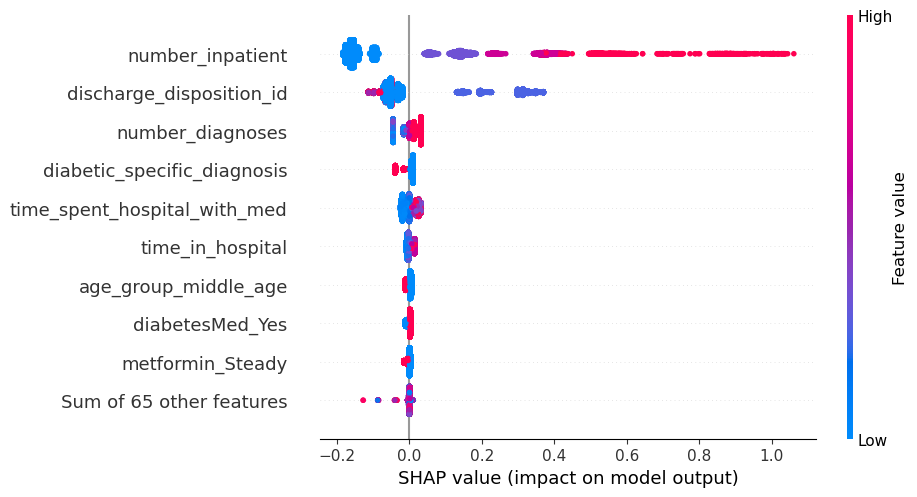

In [61]:
import shap
import pandas as pd

# Here  I am grabbing the preprocessor and classifier from the pipeline
preprocessor = best_model.named_steps["preprocessor"]
classifier = best_model.named_steps["classifier"]

def retrieve_features_pipeline(preprocessor):
    feature_names = []

    # Numerical features extraction
    # at position 0 is our numberical pipeline which is a tuple, and position 2 is our names of numerical features
    numerical_features = preprocessor.transformers_[0][2]
    # adding our numerical features names in the feature list above
    feature_names += numerical_features

    # Categorical features
    # position 1 is our categorical pipeline 
    categorical_pipeline = preprocessor.transformers_[1][1]
    # this gives our categorical feature names from the pipeline
    categorical_features = preprocessor.transformers_[1][2]
    
    # need the cat_pipeline because one hot encoder we used previously, creates new columns with new names
    one_hot_pipeline = categorical_pipeline.named_steps["one_hot_encode"]
    # now we are extracing the new names 
    one_hot_extracted_features = one_hot_pipeline.get_feature_names_out(categorical_features)
    # passing the new names to the feature_name list
    feature_names += list(one_hot_extracted_features)
    return feature_names

#Now that we have a function above that goes through the pipeline,we can now extract the feature names
# this gives a numpy array
x_transformed_test = preprocessor.transform(x_test)
# now using the above function to retrieve all the names of the comlumns from the pipeline
feature_names_all = retrieve_features_pipeline(preprocessor)
# turning the column names into a dataframe.
x_dataframe = pd.DataFrame(x_transformed_test, columns=feature_names_all)


explainer_ready = shap.Explainer(classifier, x_dataframe)
final_visualization = explainer_ready(x_dataframe)

# Finally, we are able to visualize with shap plots
shap.plots.beeswarm(final_visualization)




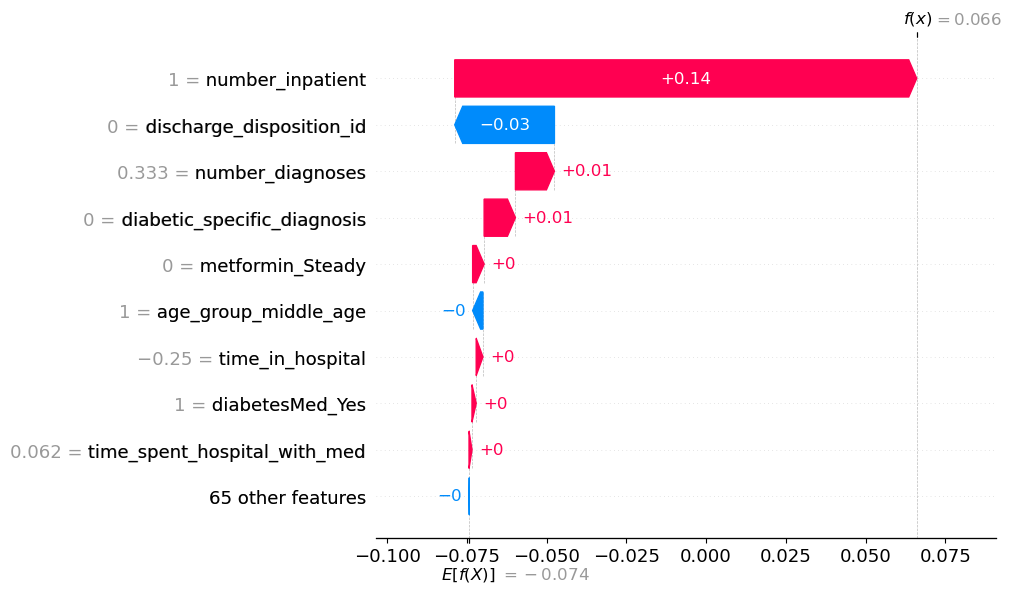

In [63]:
# Waterfall Plot
shap.plots.waterfall(final_visualization[66])